# In this ML Analysis, we will be using Support Vector Machine Supervised Algorithm to recognize hand written digits from built-in dataset.
# We will use scikit-learn package.

## Importing Support Vector Machine (SVM) from scikit-learn 

In [1]:
from sklearn import svm 
from sklearn.metrics import accuracy_score
svc = svm.SVC(gamma=0.00001,C=100.)

## Loading the digits dataset from scikit-learn

In [2]:
from sklearn import datasets 
digits = datasets.load_digits()

## Description of the digits dataset

In [3]:
print (digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Loading image for digit 7 for manipulation

In [4]:
digits.images[7]

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

## Visualizing this image for digit 7 using matplotlib
## imshow Display data as an image, i.e., on a 2D regular raster.

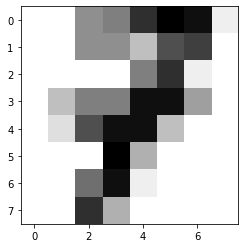

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(digits.images[7],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

## The numerical values represented by images, i.e., the targets, are contained in the digit.target array

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## The size of the dataset consists of 1797 images. We can also see the total number of columns in the dataset

In [7]:
print(digits.data.shape)

(1797, 64)


In [8]:
digits.target.size

1797

### We will use the first 1791 digits for training our machine

### We will use the last 6 digits for testing i.e. as validation set, so below is a visualization of this set.

### Our values for testing are: [4, 9, 0, 8, 9, 8]

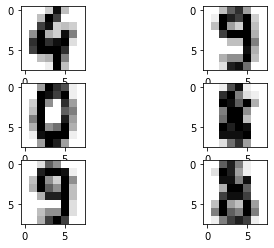

In [9]:
import matplotlib.pyplot as plt

plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.show()

## Now we are training our data on initial model

In [10]:
main_data=digits['data']
targets=digits['target']

## Case 1: 1791 Training set, and 6 Test values

## Simple training of data

In [11]:
svc.fit(digits.data[1:1791],digits.target[1:1791])
prediction = svc.predict(main_data[1791:])

## As we can see, all 6 values from above were predicted correctly

In [12]:
print("Predicted values: ", prediction)
print("Actual values: ", targets[1791:])
ac_1 = accuracy_score(targets[1791:] , prediction)*100
print("Accuracy is: ",ac_1,"%")

Predicted values:  [4 9 0 8 9 8]
Actual values:  [4 9 0 8 9 8]
Accuracy is:  100.0 %


### Our accuracy for 1791:6 division is 100%

## Modified training of data

In [13]:
from sklearn.svm import SVC
svc = SVC()
SVC(C=100., cache_size=200,class_weight=None, coef0=0.0,degree=3,
   gamma=0.001, kernel='rbf',max_iter=-1,probability=False,
   random_state=None, shrinking=True, tol=0.001, verbose=False)
svc = svm.SVC(gamma=0.001 , C=100.)
svc.fit(main_data[:1791], targets[:1791])

SVC(C=100.0, gamma=0.001)

In [14]:
print("Predicted values: ", prediction)
print("Actual values: ", targets[1791:])
print("Accuracy is: ",(accuracy_score(targets[1791:] , prediction)*100),"%")

Predicted values:  [4 9 0 8 9 8]
Actual values:  [4 9 0 8 9 8]
Accuracy is:  100.0 %


### Our accuracy for modified training is also 100%

## Case 2: 75% values for training (1348), and 25% values for testing (449)

## Training of data

In [20]:
svc.fit(main_data[:1347], targets[:1347])
prediction = svc.predict(main_data[1347:])
ac_2 = accuracy_score(targets[1347:] , prediction)*100
print("Accuracy is: ", ac_2,"%")

Accuracy is:  96.88888888888889 %


### The accuracy for 75:25 division is 96.88 %

## Case 3: 50% values for training (899), and 50% values for testing (898)

# Training of data

In [21]:
svc.fit(main_data[:899], targets[:899])
prediction = svc.predict(main_data[899:])
ac_3 = accuracy_score(targets[899:] , prediction)*100
print("Accuracy is: ", ac_3,"%")

Accuracy is:  96.99331848552339 %


### The accuracy for 50:50 division is 96.99 %

## Case 4: 20% values for training (359), and 80% values for testing (1438)

# Training of data

In [22]:
svc.fit(main_data[:359], targets[:359])
prediction = svc.predict(main_data[359:])
ac_4 = accuracy_score(targets[359:] , prediction)*100
print("Accuracy is: ", ac_4,"%")

Accuracy is:  90.12517385257301 %


### The accuracy for 80:20 division is 90.13 %

## Case 5: 5% values for training (90), and 95% values for testing (1707)

In [23]:
svc.fit(main_data[:90], targets[:90])
prediction = svc.predict(main_data[90:])
ac_5 = accuracy_score(targets[90:] , prediction)*100
print("Accuracy is: ", ac_5,"%")

Accuracy is:  82.01523140011716 %


### The accuracy for 80:20 division is 82.02 %

## Overall Conclusion

The accuracy will be much better when more data is used for training purposes, before testing the model. 


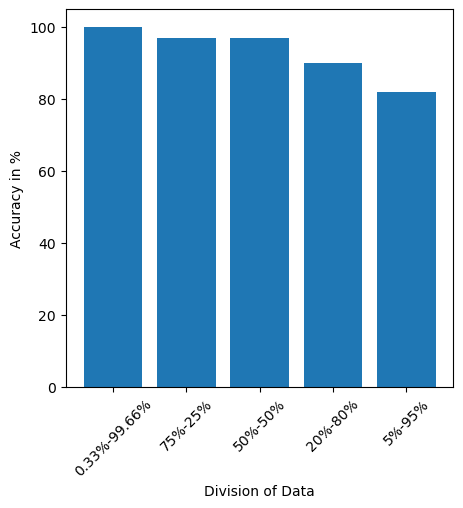

In [34]:
from matplotlib.pyplot import figure

figure(figsize=(5, 5), dpi=100)

ac_list = {"0.33%-99.66%":ac_1,"75%-25%":ac_2,"50%-50%":ac_3,
           "20%-80%":ac_4,"5%-95%":ac_5}
names = list(ac_list.keys())
values = list(ac_list.values())
plt.bar(range(len(ac_list)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.xlabel("Division of Data")
plt.ylabel("Accuracy in %")
plt.show()